FTYPE for StreamRiver = 460
FCODE 

      46003 = Intermittent

      46006 = Perennial
      
      46007 = Ephemeral 


FTYPE for ArtificialPath = 558

FCODE 55800 = ArtificalPath


FTYPE for Connector = 334

FCODE 33400 = Connector

FTYPE for CoastLine = 556

FCODE 56600 = CoastLine

FTYPE for CanalDitch = 33600

FCODE 33600 = CanalDitch


In [134]:
import rioxarray
import xrspatial
import numpy as np
import pandas as pd
import geopandas as gpd
from pygeohydro import WBD
import py3dep
from pynhd import HP3D
from pynhd import NHD, NHDPlusHR, WaterData
import pynhd
import matplotlib.pyplot as plt

In [180]:
def get_dem_and_flowlines(huc10):
    print('water boundary')
    wbd = WBD("huc10")
    boundary = wbd.byids("huc10", huc10)
    boundary.iloc[0]['geometry']
    boundary_reprojected = boundary.to_crs(3310)

    print('getting dem')
    dem = py3dep.get_map("DEM", boundary.geometry.iloc[0], resolution=10, geo_crs=boundary.crs, crs=4326)
    dem = dem.rio.reproject(3310)

    print('flowlines medium resolution')
    nhd_mr = NHD("flowline_mr")
    flowlines_mr = nhd_mr.bygeom(boundary.geometry.iloc[0].bounds)
    flowlines_mr = flowlines_mr.to_crs(3310)
    flowlines_mr = flowlines_mr.clip(boundary_reprojected.geometry.iloc[0])
    
    print('flowlines high resolution')
    nhd_hr = NHDPlusHR("flowline")
    flowlines_hr = nhd_hr.bygeom(boundary.geometry.iloc[0].bounds)
    flowlines_hr = flowlines_hr.to_crs(3310)
    flowlines_hr = flowlines_hr.clip(boundary_reprojected.geometry.iloc[0])
    
    return dem, flowlines_mr, flowlines_hr

def get_terrain(dem):
    hillshade = xrspatial.hillshade(dem)
    slope = xrspatial.slope(dem)
    curvature = xrspatial.slope(dem)
    return hillshade, slope, curvature

In [181]:
huc10 = 1806000601
dem, mr, hr = get_dem_and_flowlines(huc10)
hillshade, slope, curvature = get_terrain(dem)

water boundary
getting dem


/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


flowlines medium resolution
flowlines high resolution


/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:23: RuntimeWarning: invalid value encountered in sin
  shaded = np.sin(altituderad) * np.sin(slope) + \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:24: RuntimeWarning: invalid value encountered in cos
  np.cos(altituderad) * np.cos(slope) * \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:25: RuntimeWarning: invalid value encountered in cos
  np.cos((azimuthrad - np.pi/2.) - aspect)


In [182]:
vaa = pd.read_parquet("/Users/arthurkoehl/Desktop/nhdplusVAA.parquet")

<Axes: >

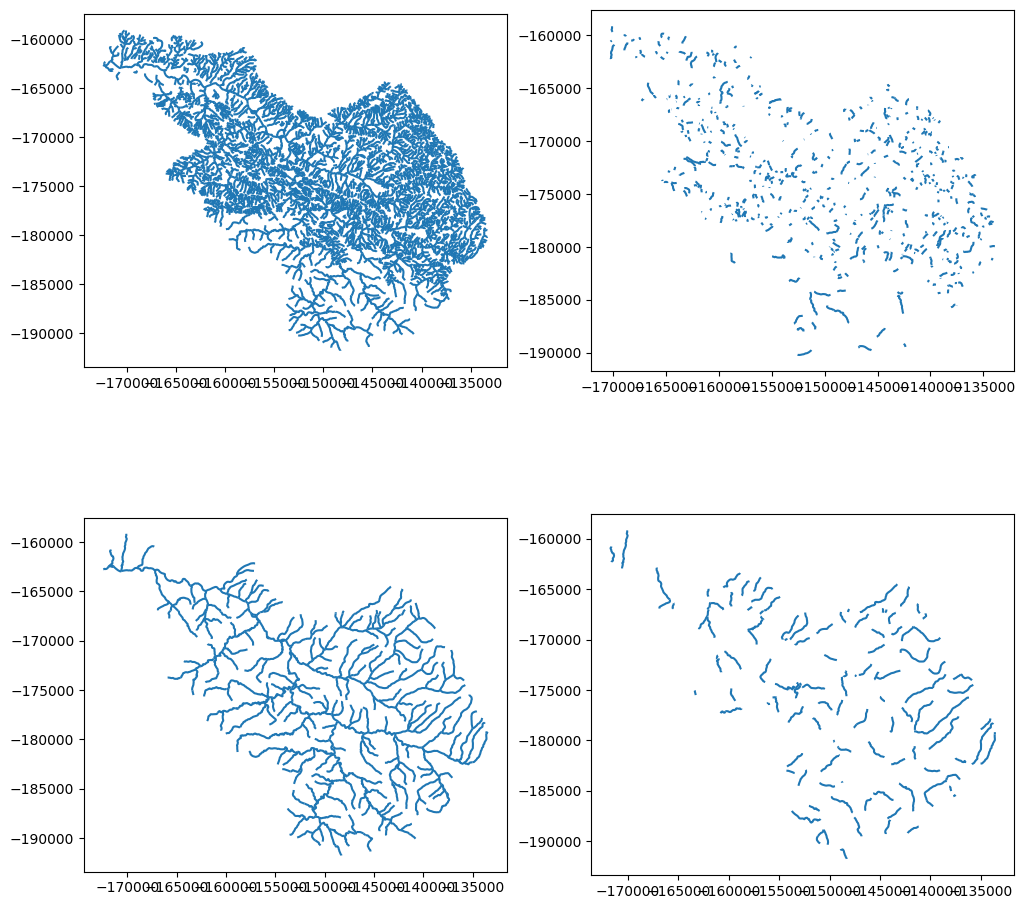

In [198]:
fig, axes = plt.subplots(2,2, figsize=(12,12))

hr.plot(ax=axes[0,0])
hr.loc[hr['OBJECTID'].isin(vaa['comid'])].plot(ax=axes[0,1])

mr.plot(ax=axes[1,0])
mr.loc[mr['OBJECTID'].isin(vaa['comid'])].plot(ax=axes[1,1])